In [62]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import seaborn as sns

# Nuclear Explosions Test & Cold War Visualization

### Description

* Dataset: https://www.kaggle.com/datasets/utkarshx27/nuclear-explosions-data
    * Contains: 2048 recorded nuclear explosions up untill the year 2000. 
      * Coordinates
      * Yield
      * Name
      * From Country
      * Region Dropped
      * ...
    * Validity: I rate its validity as high. 
---
* Aim: Vizualize the distribution of nuclear explosions across the world and find some interesting highlight.
  * Tsarbomba
  * Total yield ever dropped
  * Learn Folium
---


## EDA
Exploritory Data Analysis

### Nuclear Explosions Data Set 1945 - 2000

In [8]:
nuclear_df = pd.read_csv("nuclear_explosions.csv") # read in the nuclear explosion data

In [9]:
# tsarbomba har index 355. 
nuclear_df.at[355, "Data.Name"] = "Tsar Bomba"

<Axes: xlabel='Date.Year', ylabel='Date.Month'>

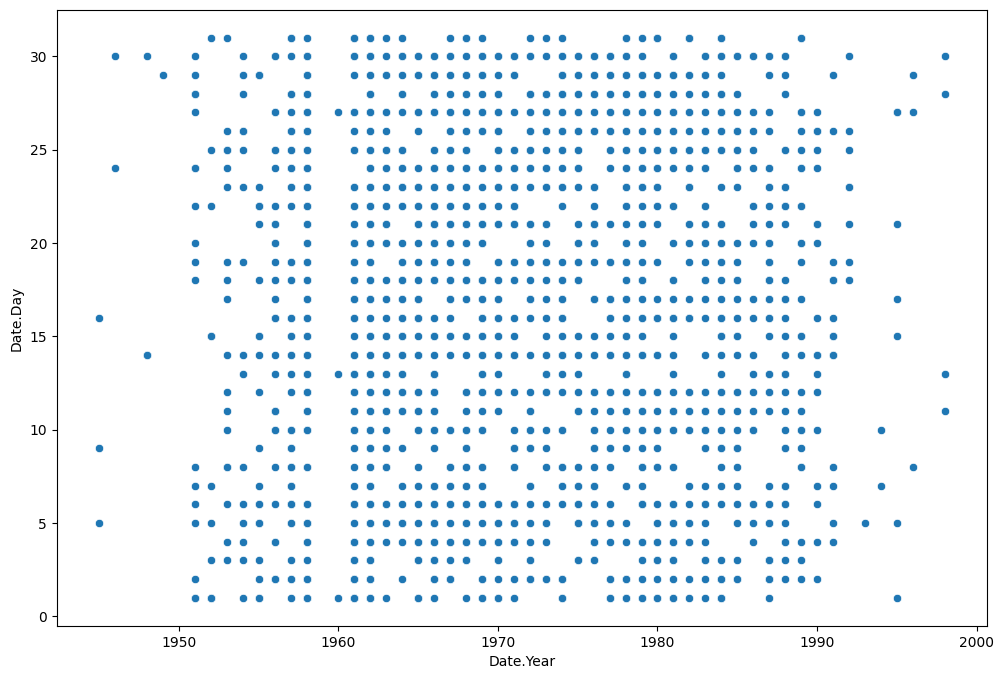

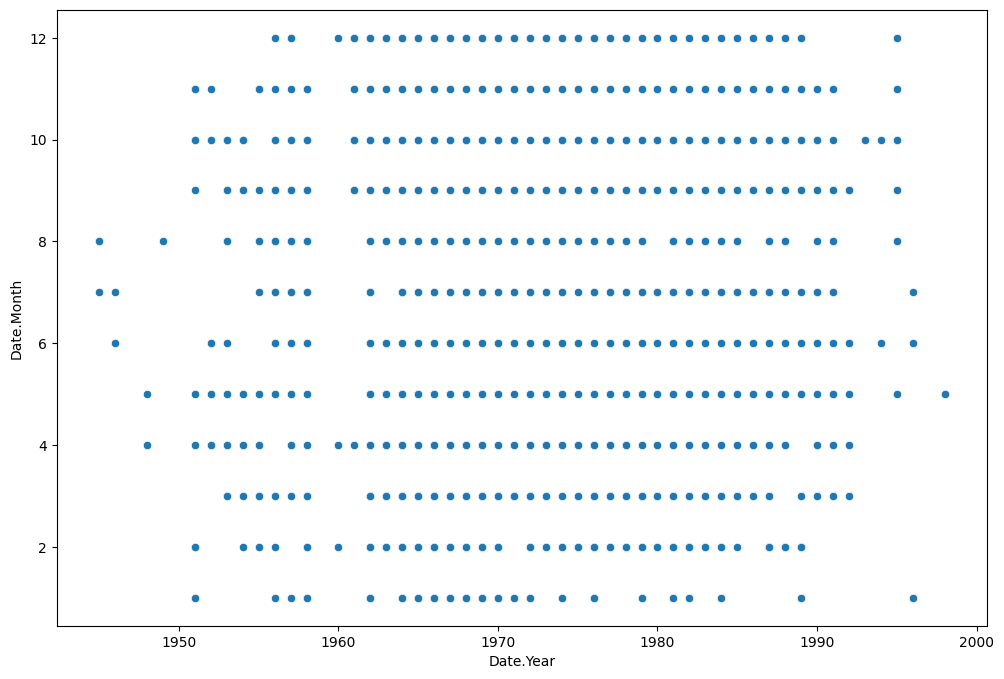

In [10]:
nuclear_df["Date.Year"].unique()
nuclear_df["Date.Month"].unique()
nuclear_df["Date.Day"].unique()

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="Date.Year", y="Date.Day", data=nuclear_df, ax=ax)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="Date.Year", y="Date.Month", data=nuclear_df, ax=ax)

In [11]:
nuclear_df.groupby("Location.Country").count().sort_values("Location.Region", ascending=False)

,Location.Region,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
Location.Country,,,,,,,,,,,,,,,
USA,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
USSR,714,714,714,714,714,714,714,714,714,714,714,714,714,714,714
FRANCE,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
UK,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
CHINA,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
INDIA,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
PAKIST,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [12]:
countries = nuclear_df["Location.Country"].unique().tolist()

In [13]:
nuclear_df.head()

,Location.Country,Location.Region,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946


In [14]:
pd.set_option('display.max_rows', 21)
nuclear_df.groupby("Data.Type").describe()

Location.Cordinates.Latitude                                        \
                                 count       mean        std    min      25%   
Data.Type                                                                      
Airdrop                           78.0  18.192949  20.724570 -30.00   2.0000   
Atmosph                          184.0  60.192880  12.233475  37.00  50.0000   
Balloon                           60.0   2.845283  28.795345 -30.00 -22.0000   
Barge                             40.0   7.991250  10.124468 -22.00  11.3000   
Crater                             9.0  37.109667   0.126287  37.00  37.0000   
Gallery                           13.0  24.020231   0.082183  23.80  24.0000   
Mine                               1.0   0.000000        NaN   0.00   0.0000   
Rocket                            12.0   4.762500  31.619960 -49.50   2.7125   
Shaft                           1015.0  40.301107   8.467673   0.00  37.0000   
Shaft/Gr                          85.0 -20.600271   5.229880 -22.40 -22.0000   
Shaft/Lg                          56.0 -20.299214   5.688954 -22.34 -22.0000   
Ship                               1.0 -20.400000        NaN -20.40 -20.4000   
Space                              4.0  48.000000   0.000000  48.00  48.0000   
Surface                           62.0  38.550806  16.893634 -30.00  37.0000   
Tower                             75.0  21.438667  23.660975 -30.00  11.3000   
Tunnel                           310.0  49.589410  10.760210   0.00  49.7000   
Ug                                31.0  27.517000  25.083796 -22.25  27.7800   
Uw                                 8.0  38.860375  28.725705  11.30  11.3375   
Water Su                           1.0  73.000000        NaN  73.00  73.0000   
Watersur                           1.0  70.700000        NaN  70.70  70.7000   

                                    Location.Cordinates.Longitude              \
               50%      75%     max                         count        mean   
Data.Type                                                                       
Airdrop    13.9000  37.0000  73.000                          78.0  -79.100641   
Atmosph    50.0000  73.0000  75.100                         184.0   65.452935   
Balloon   -22.0000  37.0000  37.000                          60.0 -120.866383   
Barge      11.3000  11.3500  11.350                          40.0  133.331250   
Crater     37.0300  37.2400  37.280                           9.0 -116.198333   
Gallery    24.0000  24.0540  24.160                          13.0    5.052923   
Mine        0.0000   0.0000   0.000                           1.0    0.000000   
Rocket     16.4500  16.4500  41.500                          12.0 -103.470000   
Shaft      37.1000  37.3300  73.000                        1015.0  -68.236727   
Shaft/Gr  -22.0000 -21.8900   0.000                          85.0 -130.535247   
Shaft/Lg  -21.8885 -21.8320   0.000                          56.0 -128.986268   
Ship      -20.4000 -20.4000 -20.400                           1.0  115.570000   
Space      48.0000  48.0000  48.000                           4.0   46.000000   
Surface    47.0000  50.0000  73.000                          62.0   34.363871   
Tower      37.0000  37.0000  41.500                          75.0  -30.373400   
Tunnel     49.8125  50.0000  74.300                         310.0   32.889316   
Ug         41.5590  41.6365  41.763                          31.0   41.939452   
Uw         30.1165  71.2750  73.000                           8.0   50.347875   
Water Su   73.0000  73.0000  73.000                           1.0   55.000000   
Watersur   70.7000  70.7000  70.700                           1.0   53.500000   

           ... Date.Month       Date.Year                                 \
           ...        75%   max     count         mean       std     min   
Data.Type  ...                                                             
Airdrop    ...       9.00  12.0      78.0  1959.397436  6.940077  1945.0   
A

In [15]:
pd.set_option('display.max_rows', 10)

#### Interessting statistics with this dataset. 
* updating overtime barplot to see the armsrace in action
* who has created the most kilotons (vizulize them all in some kind of big bubbles)
* which month of the year was most common / which quarter was most common.
* 

##### Viz of armsrams by tests

In [16]:
from matplotlib.animation import FuncAnimation

# Calculating the cumulative sum of tests for each country over the years
nuclear_df['Number_of_Tests'] = 1
cumulative_data = nuclear_df.groupby(['Location.Country', 'Date.Year']).size().groupby(level=0).cumsum().reset_index()
cumulative_data.columns = ['Location.Country', 'Date.Year', 'Cumulative_Tests']

# Sorting data to have the animation in order
cumulative_data = cumulative_data.sort_values(by='Date.Year')

# Getting the list of unique years and countries
years = cumulative_data['Date.Year'].unique()
countries = cumulative_data['Location.Country'].unique()

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(10,8))

# Function to update the plot for each year
def update(year):
    ax.clear()
    year_data = cumulative_data[cumulative_data['Date.Year'] <= year].sort_values(by="Cumulative_Tests", ascending=False)
    sns.barplot(x='Cumulative_Tests', y='Location.Country', data=year_data, ci=None, ax=ax)
    ax.set_title(f'Nuclear Tests Up to Year: {year}', fontsize=16)

# Creating an animation
ani = FuncAnimation(fig, update, frames=years, repeat=False)

# Saving the animation as a GIF
ani.save(rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\animated cumsum of tests\nuclear_tests_animation.gif', writer='imagemagick', fps=2)

plt.close(fig)

## what are the different unique types of tests in my dataset?
nuclear_df["Data.Type"].unique()



MovieWriter imagemagick unavailable; using Pillow instead.


C:\Users\erik_\AppData\Local\Temp\ipykernel_5464\626893917.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cumulative_Tests', y='Location.Country', data=year_data, ci=None, ax=ax)
C:\Users\erik_\AppData\Local\Temp\ipykernel_5464\626893917.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cumulative_Tests', y='Location.Country', data=year_data, ci=None, ax=ax)
C:\Users\erik_\AppData\Local\Temp\ipykernel_5464\626893917.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cumulative_Tests', y='Location.Country', data=year_data, ci=None, ax=ax)
C:\Users\erik_\AppData\Local\Temp\ipykernel_5464\626893917.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cumulative_Tests', y='Location.Country', data=year_data, ci=None, ax=ax)
C:\U

array(['Tower', 'Airdrop', 'Uw', 'Surface', 'Crater', 'Ship', 'Atmosph',
       'Barge', 'Balloon', 'Rocket', 'Shaft', 'Tunnel', 'Watersur',
       'Space', 'Gallery', 'Water Su', 'Ug', 'Shaft/Gr', 'Mine',
       'Shaft/Lg'], dtype=object)

### All bombs untill year selected and their kiloton in scale

nuclear_df = pd.read_csv("nuclear_explosions.csv")

Location.Country
USSR      370460.3310
USA       232941.5377
CHINA      25926.0000
FRANCE     21510.0000
UK         10808.0000
PAKIST        53.0000
INDIA         41.0000
Name: Data.Yeild.Upper, dtype: float64

In [33]:
## Getting the sum of yield for each country
df = nuclear_df.groupby("Location.Country")["Data.Yeild.Upper"].sum().sort_values(ascending=False)
df

Location.Country
USSR      370460.3310
USA       232941.5377
CHINA      25926.0000
FRANCE     21510.0000
UK         10808.0000
PAKIST        53.0000
INDIA         41.0000
Name: Data.Yeild.Upper, dtype: float64

<Axes: xlabel='Location.Country'>

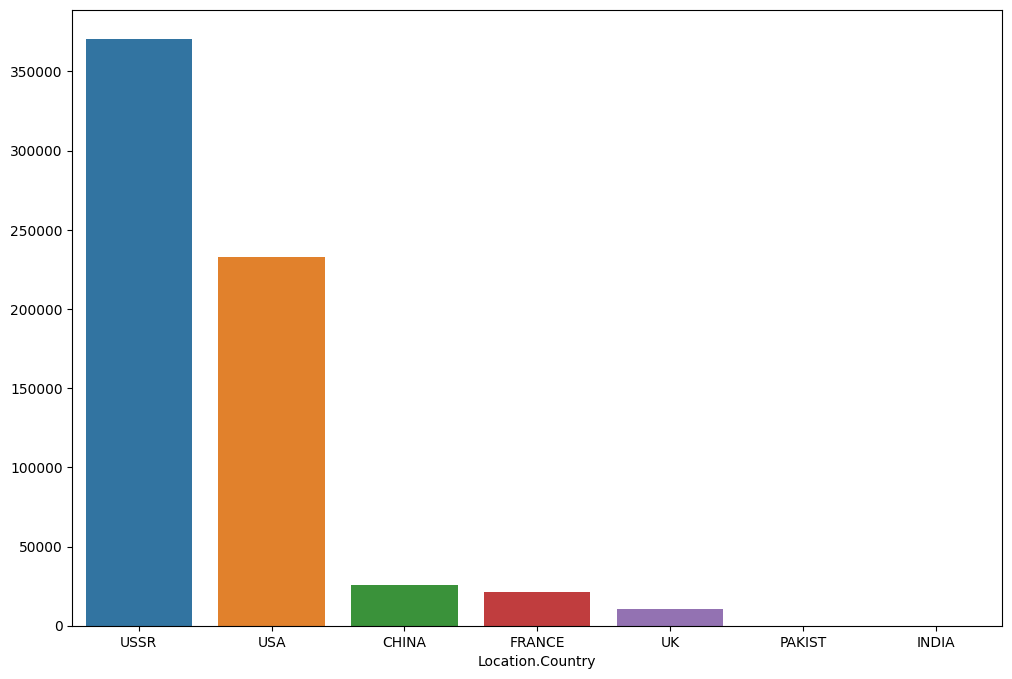

In [36]:
## Plotting the cumulative sum of tests for each country over the years
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df.index, y=df.values, ax=ax)

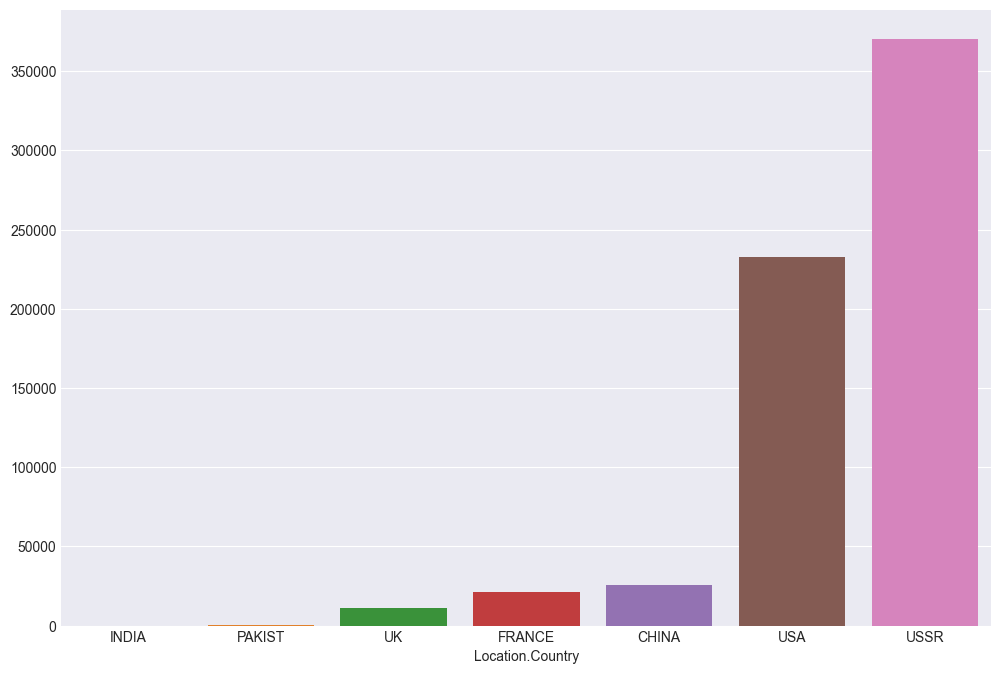

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

df = nuclear_df.groupby("Location.Country")["Data.Yeild.Upper"].sum().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df.index, y=df.values, ax=ax)

plt.show()

In [305]:

pd.DataFrame(nuclear_df.iloc[355]).T

,Location.Country,Location.Region,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
355,USSR,Nz Russ,UGS,73.8,53.5,0.0,0.0,0.0,50000.0,50000.0,Wr,Tsar Bomba,Atmosph,30,10,1961


In [336]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

C:\Users\erik_\AppData\Local\Temp\ipykernel_5464\590288894.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')                           # set the style


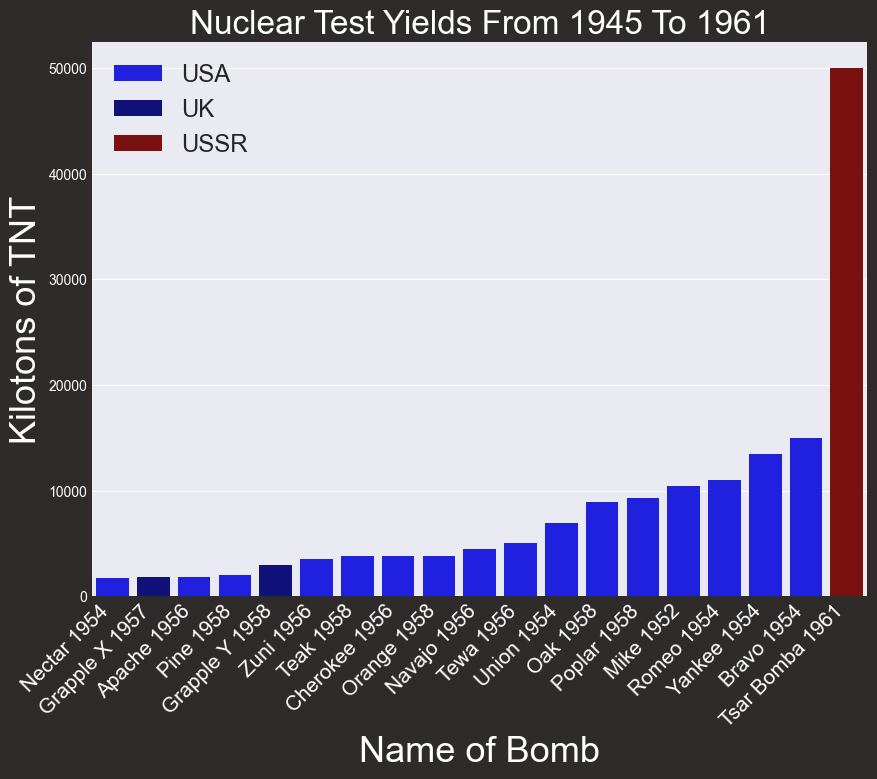

In [48]:
year_selected = 1962
year_selected_lower = 1944

# Define the palette
palette = {"USA": "blue", "USSR": "darkred", "UK": "darkblue"}

def customize_plot():
    """This function customizes the plot
    By setting the font, the figure size, the style, the title, the xticks, the tick colors and the tick sizes"""
    plt.rcParams['font.family'] = 'TT Drugs'                    # set the font
    plt.figure(figsize=(10,7.2), facecolor="#2e2b2a")           # set the figure size and the background color
    plt.style.use('seaborn-darkgrid')                           # set the style
    plt.title('Nuclear Test Yields From 1945 To 1961', color='white', fontsize=24) # set the title and define the color and the size
    plt.xticks(rotation=45, ha="right", fontsize=18)            # set the xticks
    plt.tick_params(colors='white')                             # set the tick colors

def yield_per_bomb_until_year(year_selected, year_selected_lower):
    """Plots the yield of each bomb tested within a specific year range.

    Args:
        nuclear_df (pd.DataFrame): The dataset containing nuclear test data.
        year_selected (int): The upper bound year for the plot.
        year_selected_lower (int): The lower bound year for the plot.
        palette (dict): A dictionary defining colors for different countries.
    """
    df = nuclear_df[(nuclear_df["Date.Year"] > year_selected_lower) & (nuclear_df["Date.Year"] < year_selected)] # filter the dataframe to only include the years we want
    df = df[df["Data.Yeild.Upper"] > 1500] # filter the dataframe to only include bombs with a yield above 1500
    df = df[df["Data.Name"] != "Nan"] # filter the dataframe to only include bombs with a name
    df = df.sort_values(by="Data.Yeild.Upper") # sort the dataframe by yield
    df['Name_and_Year'] = df['Data.Name'] + ' ' + df['Date.Year'].astype(str) #
    customize_plot()
    
    ax = sns.barplot(x='Name_and_Year', y='Data.Yeild.Upper', data=df, hue='Location.Country', palette=palette, dodge=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=15)
    plt.xlabel('Name of Bomb', color='white', fontsize=26)
    plt.ylabel('Kilotons of TNT', color='white', fontsize=26)
    ax.legend(fontsize='xx-large')


# Call the function with specific years
yield_per_bomb_until_year(year_selected, year_selected_lower)

In [51]:
## total amount of tests per country
"""not fineshed yet"""

'not fineshed yet'

### DPRK North Korea Tests

In [52]:
"""not implemented yet"""

'not implemented yet'

### USA Mil. Expenditure Data
https://www.sipri.org/databases/milex

#### USA Mil Expenditure

In [53]:
#mil_exp = pd.read_csv("SIPRI-Milex-data-1949-2022.xlsx")
"""manually imported instead"""

'manually imported instead'

In [54]:
# Step 1: Assign the data to a string variable
data_str = "14088,2 14927,0 34491,6 49660,7 51516,8 44640,1 42120,5 43312,0 46072,6 47050,2 47819,2 47346,6 49879,8 54650,9 54561,2 53432,3 54561,8 66442,8 78398,4 84329,0 84990,2 83408,0 78238,0 80708,1 81469,8 89278,9 92080,9 94715,3 104665,2 113382,1 126879,9 143688,4 176558,9 221673,5 223427,2 245149,2 272163,2 295546,2 304086,6 309661,3 321866,6 325129,3 299372,8 325033,7 316719,4 308084,0 295853,1 287960,7 293167,8 290996,1 298094,9 320086,3 331805,6 378463,1 440532,1 492999,4 533203,0 558335,0 589586,0 656756,0 705917,0 738005,0 752288,0 725205,0 679229,0 647789,0 633829,6 639856,4 646752,9 682491,4 734344,1 778397,2 806230,2 876943,2"

# Step 2 and 3: Splitting the string by spaces and converting each string to float after replacing comma with dot
usa_milexp = [float(value.replace(",", ".")) for value in data_str.split()]

# Output the data list
usa_milexp

[14088.2,
 14927.0,
 34491.6,
 49660.7,
 51516.8,
 44640.1,
 42120.5,
 43312.0,
 46072.6,
 47050.2,
 47819.2,
 47346.6,
 49879.8,
 54650.9,
 54561.2,
 53432.3,
 54561.8,
 66442.8,
 78398.4,
 84329.0,
 84990.2,
 83408.0,
 78238.0,
 80708.1,
 81469.8,
 89278.9,
 92080.9,
 94715.3,
 104665.2,
 113382.1,
 126879.9,
 143688.4,
 176558.9,
 221673.5,
 223427.2,
 245149.2,
 272163.2,
 295546.2,
 304086.6,
 309661.3,
 321866.6,
 325129.3,
 299372.8,
 325033.7,
 316719.4,
 308084.0,
 295853.1,
 287960.7,
 293167.8,
 290996.1,
 298094.9,
 320086.3,
 331805.6,
 378463.1,
 440532.1,
 492999.4,
 533203.0,
 558335.0,
 589586.0,
 656756.0,
 705917.0,
 738005.0,
 752288.0,
 725205.0,
 679229.0,
 647789.0,
 633829.6,
 639856.4,
 646752.9,
 682491.4,
 734344.1,
 778397.2,
 806230.2,
 876943.2]

In [55]:
# Years from 1949-2022
years_list = list(range(1949, 2023))
years_list

[1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

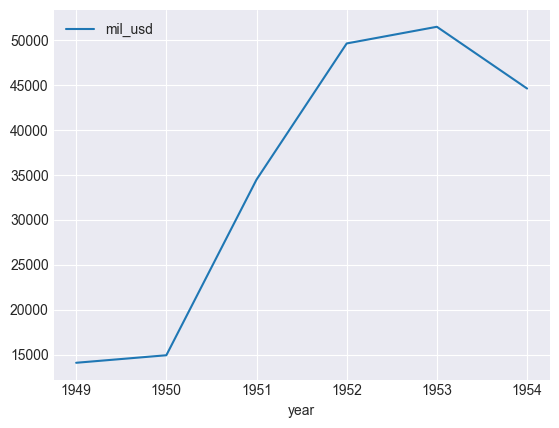

In [56]:
# Combined into DataFrame
df_milexp = pd.DataFrame({"year": years_list, "mil_usd": usa_milexp})
df_milexp = df_milexp[df_milexp["year"] < 1955]
df_milexp.plot.line(x="year", y="mil_usd")
plt.show()

In [57]:
df_milexp

,year,mil_usd
0,1949,14088.2
1,1950,14927.0
2,1951,34491.6
3,1952,49660.7
4,1953,51516.8
5,1954,44640.1


In [64]:
"""getting the increase in military spending from 1949 to 1952"""
times_increase = df_milexp.loc[df_milexp["year"] == 1952, "mil_usd"].values[0] / df_milexp.loc[df_milexp["year"] == 1949, "mil_usd"].values[0]
percent_increase = (times_increase - 1) * 100
percent_increase # used in presentation

252.498544881532

#### USSR?, any good economic data?

In [65]:
"""didnt find any good data for this"""

'didnt find any good data for this'

## VIZUALIZATIONS

In [66]:
"""notes for vizualization"""
# convert dataframe long and lat into data
## keep orignal index so that it is key with explosions details other. 


'notes for vizualization'

### Folium Viz

In [67]:
"""geojson data used for the map"""
## https://github.com/glynnbird/countriesgeojson/tree/master

'geojson data used for the map'

##### Defining colors

In [72]:
# COLORS! and key for colors

# Creating heatmaps for each country
country_names_codes = [("united states of america", "USA"), ("united kingdom", "UK"), ("france", "FRANCE"), 
                       ("india", "INDIA"), ("russia", "USSR"), ("china", "CHINA"), ("pakistan", "PAKIST")]

overlay_colors_west_v_east = {
    "USA": 'blue',
    "UK": 'blue',
    "FRANCE": 'blue',
    "INDIA": 'red',
    "USSR": 'red',
    "CHINA": 'red',
    "PAKIST": 'red'
}

# according to 2nd heatmap
overlay_colors_west = {
    "USA": 'blue',
    "UK": 'blue',
    "FRANCE": 'blue',
    "INDIA": 'darkorange',
    "USSR": 'darkred',
    "CHINA": 'purple',
    "PAKIST": 'darkgreen'
}

# corrolates to first overlay colors
heatmap_gradients_west_v_east = {
    "USA": {0.0: 'lightblue', 0.2: 'deepskyblue', 0.4: 'dodgerblue', 0.6: 'royalblue', 0.8: 'mediumblue', 1.0: 'blue'},
    "UK": {0.0: 'lightblue', 0.2: 'deepskyblue', 0.4: 'dodgerblue', 0.6: 'royalblue', 0.8: 'mediumblue', 1.0: 'blue'},
    "FRANCE": {0.0: 'lightblue', 0.2: 'deepskyblue', 0.4: 'dodgerblue', 0.6: 'royalblue', 0.8: 'mediumblue', 1.0: 'blue'},
    "INDIA": {0.0: 'lightsalmon', 0.2: 'salmon', 0.4: 'darksalmon', 0.6: 'red', 0.8: 'darkred', 1.0: 'firebrick'},
    "USSR": {0.0: 'lightsalmon', 0.2: 'salmon', 0.4: 'darksalmon', 0.6: 'red', 0.8: 'darkred', 1.0: 'firebrick'},
    "CHINA": {0.0: 'lightsalmon', 0.2: 'salmon', 0.4: 'darksalmon', 0.6: 'red', 0.8: 'darkred', 1.0: 'firebrick'},
    "PAKIST": {0.0: 'lightsalmon', 0.2: 'salmon', 0.4: 'darksalmon', 0.6: 'red', 0.8: 'darkred', 1.0: 'firebrick'}
}

heatmap_gradients_west = {
    "USA": {0.0: 'lightblue', 0.2: 'deepskyblue', 0.4: 'dodgerblue', 0.6: 'royalblue', 0.8: 'mediumblue', 1.0: 'blue'},
    "UK": {0.0: 'lightblue', 0.2: 'deepskyblue', 0.4: 'dodgerblue', 0.6: 'royalblue', 0.8: 'mediumblue', 1.0: 'blue'},
    "FRANCE": {0.0: 'lightblue', 0.2: 'deepskyblue', 0.4: 'dodgerblue', 0.6: 'royalblue', 0.8: 'mediumblue', 1.0: 'blue'},
    "INDIA": {0.0: 'salmon', 0.2: 'darkorange', 0.4: 'orange', 0.6: 'gold', 0.8: 'yellow', 1.0: 'lightyellow'},
    "USSR": {0.0: 'lightcoral', 0.2: 'indianred', 0.4: 'firebrick', 0.6: 'darkred', 0.8: 'maroon', 1.0: 'red'},
    "CHINA": {0.0: 'pink', 0.2: 'lightpink', 0.4: 'hotpink', 0.6: 'deeppink', 0.8: 'mediumvioletred', 1.0: 'purple'},
    "PAKIST": {0.0: 'lightgreen', 0.2: 'limegreen', 0.4: 'forestgreen', 0.6: 'green', 0.8: 'darkgreen', 1.0: 'darkolivegreen'}
}

In [69]:
# selections:
year_selected = 2001

gradient_selected = heatmap_gradients_west

overlay_selected = overlay_colors_west

tiles_style = 'cartodbdark_matter'

In [71]:
def create_geojson_overlay(country_name, country_code, overlay_colors):
    """Function to create a geojson overlay for a specific country.
    Args:
        country_name (str): The name of the country.
        country_code (str): The country code.
        overlay_colors (dict): A dictionary defining colors for different countries.
    Returns:
        folium.GeoJson: A GeoJson overlay for the country.
    """
    country_geojson = gpd.read_file(rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\geojsons\{country_name.lower()}.geojson')
    color = overlay_colors[country_code]
    return folium.GeoJson(country_geojson, style_function=lambda x: {'color': color, 'fillOpacity': 0.025}, name=country_name)


In [88]:
# Define custom gradients for each country
from folium.plugins import HeatMap

# Creating a heatmap for each country with custom gradient
def create_heatmap_for_country_with_dynamic_radius_and_custom_gradient(country):
    """Creates a heatmap for a specific country with a custom gradient and dynamic radius.
    Args:
        country (str): The name of the country.
    Returns:
        str: The file path of the HTML file containing the heatmap.
    """
    # Filtering data for the country
    country_data = nuclear_df[nuclear_df['Location.Country'] == country]
    
    # Calculating a dynamic radius factor based on the number of tests conducted by the country
    radius_factor = max(1, 100 / len(country_data))
    
    # Creating a new base map with a dark theme
    m = folium.Map(location=[20,0], zoom_start=2, tiles=tiles_style)
    
    # Preparing data for the heatmap (lat, lon, radius based on yield value and number of tests)
    heatmap_data = country_data.apply(lambda row: [row['Location.Cordinates.Latitude'], 
                                                   row['Location.Cordinates.Longitude'], 
                                                   (row['Data.Yeild.Upper']/10) * radius_factor], 
                                                   axis=1).values.tolist()
    
    # Adding the heatmap layer to the map with a custom gradient
    HeatMap(heatmap_data, gradient=gradient_selected[country]).add_to(m)
    
    # Add geojson overlay
    ## First getting the country name from country_names_codes
    search_country = country
    country_name = [country for country in country_names_codes if country[1].lower() == search_country.lower()][0][0]
    geojson_overlay = create_geojson_overlay(country_name, country, overlay_selected)
    m.add_child(geojson_overlay)

    
    # Saving the map to an HTML file
    output_directory = r"C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\folium heatmaps"
    file_path = os.path.join(output_directory, f'heatmap_dynamic_custom_{country}.html')
    m.save(file_path)
    
    return file_path

# Creating a heatmap for each country with custom gradient and dynamic radius and collecting the file paths
heatmap_file_paths_with_dynamic_radius_and_custom_gradient = []
for country in countries:
    file_path = create_heatmap_for_country_with_dynamic_radius_and_custom_gradient(country)
    heatmap_file_paths_with_dynamic_radius_and_custom_gradient.append(file_path)

heatmap_file_paths_with_dynamic_radius_and_custom_gradient


['C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_USA.html',
 'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_USSR.html',
 'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_UK.html',
 'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_FRANCE.html',
 'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_CHINA.html',
 'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_INDIA.html',
 'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\folium heatmaps\\heatmap_dynamic_custom_PAKIST.html']

#### Imdividual Countries Highlighted

In [90]:
# WORKING

data = pd.read_csv("nuclear_explosions.csv")
data = data[data["Date.Year"] < year_selected]

# green vs blue SAME end
custom_gradients = gradient_selected
overlay_colors = overlay_selected

# Defining a function to create heatmaps for each country
def create_heatmap(country_name, country_code, gradient):
    country_data = data[data['Location.Country'] == country_code]
    country_geojson = gpd.read_file(rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\geojsons\{country_name.lower()}.geojson')

    # Creating the map
    m = folium.Map(location=[20,0], zoom_start=2, tiles=tiles_style)
    # adding fullscreen plugi
    folium.plugins.Fullscreen(position="bottomright").add_to(m)
    # adding zoom plugin
    folium.LatLngPopup().add_to(m)

    # Adding the heatmap layer
    heatmap_data = country_data[["Location.Cordinates.Latitude", "Location.Cordinates.Longitude", "Data.Yeild.Upper"]].values.tolist()
    HeatMap(data=heatmap_data, gradient=gradient).add_to(m)

    # Add geojson overlay
    geojson_overlay = create_geojson_overlay(country_name, country_code, overlay_colors)
    m.add_child(geojson_overlay)

    # Adding custom JavaScript function for zoom control
    iframe = folium.IFrame(html=f"<script>{zoom_js}</script>", width=1, height=1)
    folium.Popup(iframe, max_width=2650).add_to(m)



    
    # Saving the map to an HTML file
    m.save(rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\{country_name}_heatmap_with_highlighted_boundary_v3_{year_selected}.html')
    #C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps


for country_name, country_code in country_names_codes:
    create_heatmap(country_name, country_code, custom_gradients[country_code])


NameError: name 'zoom_js' is not defined

#### All Countries W.O overlay

In [177]:
pd.set_option('display.max_rows', 10)

In [163]:
# Importing necessary libraries
from folium.plugins import HeatMap
import folium
import pandas as pd

# Load the data
data = pd.read_csv("nuclear_explosions.csv")
data = data[data["Date.Year"] < year_selected]

# Define custom gradients
custom_gradients = gradient_selected

# Create a main map object
m = folium.Map(location=[20, 0], zoom_start=2, tiles=tiles_style)

# Add plugins
folium.plugins.Fullscreen(position="bottomright").add_to(m)
folium.LatLngPopup().add_to(m)

# Create and add heatmap layers for each country
country_names_codes = [("united states of america", "USA"), ("united kingdom", "UK"), ("france", "FRANCE"), 
                       ("india", "INDIA"), ("russia", "USSR"), ("china", "CHINA"), ("pakistan", "PAKIST")]

for country_name, country_code in country_names_codes:
    country_data = data[data['Location.Country'] == country_code]
    heatmap_data = country_data[["Location.Cordinates.Latitude", "Location.Cordinates.Longitude", "Data.Yeild.Upper"]].values.tolist()
    HeatMap(data=heatmap_data, gradient=custom_gradients[country_code]).add_to(m)

# Save the map to an HTML file
heatmap_file_path = rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\all_country_heatmapv{year_selected}.html'
m.save(heatmap_file_path)

heatmap_file_path


'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\all_country_heatmapv3THISONE.html'

#### All Countries W overlay

In [161]:
# Step 1: Load the data and geojson files
data = pd.read_csv("nuclear_explosions.csv")
data = data[data["Date.Year"] < year_selected]

# Custom colors for geojson overlays
overlay_colors = overlay_selected
# corrolates to first overlay colors
heatmap_gradients = gradient_selected


# Step 2: Create a function to generate individual geojson overlays with unique colors for each country
def create_geojson_overlay(country_name, country_code):
    country_geojson = gpd.read_file(rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\geojsons\{country_name.lower()}.geojson')
    color = overlay_colors[country_code]
    return folium.GeoJson(country_geojson, style_function=lambda x: {'color': color, 'fillOpacity': 0.025}, name=country_name)

# Step 2.5: Create a function to generate individual heatmaps with these unique color gradients
def create_individual_heatmap(country_name, country_code, gradient):
    country_data = data[data['Location.Country'] == country_code]
    heatmap_data = country_data[["Location.Cordinates.Latitude", "Location.Cordinates.Longitude", "Data.Yeild.Upper"]].dropna().values.tolist()
    return HeatMap(data=heatmap_data, gradient=gradient, name=country_name)


# Step 3: Create individual heatmaps and geojson overlays and add them to the map
m = folium.Map(location=[20, 0], zoom_start=2, tiles=tiles_style)

for country_name, country_code in country_names_codes:
    # Add heatmap layer
    heatmap_layer = create_individual_heatmap(country_name, country_code, heatmap_gradients[country_code])
    m.add_child(heatmap_layer)
    
    # Add geojson overlay
    geojson_overlay = create_geojson_overlay(country_name, country_code)
    m.add_child(geojson_overlay)

# Add plugins
folium.plugins.Fullscreen(position="bottomright").add_to(m)
folium.LatLngPopup().add_to(m)

# Step 5: Save the final map to an HTML file
heatmap_file_path = rf'C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\all_with_overlay3{year_selected}.html'
m.save(heatmap_file_path)

heatmap_file_path


'C:\\Users\\erik_\\Documents\\NOD Bootcamp\\Projects\\Project 3 - Large Data\\heatmaps\\all_with_overlay3.html'

### Plotly Testing

In [204]:
#NO ANIMATION
import plotly.express as px
#Converting day, year and month to a single date column

year_selected = 1947

nuclear_df = pd.read_csv("nuclear_explosions.csv")
nuclear_df = nuclear_df[nuclear_df["Date.Year"] < year_selected]
nuclear_df['Date'] = pd.to_datetime(nuclear_df['Date.Year']*10000 + nuclear_df['Date.Month']*100 + nuclear_df['Date.Day'], format='%Y%m%d')

# year and month to single date
#nuclear_df['Date'] = pd.to_datetime(nuclear_df['Date.Year']*10000 + nuclear_df['Date.Month']*100 + nuclear_df['Date.Day'], format='%Y%m%d')

# Creating the plot
fig = px.scatter_geo(nuclear_df, 
                     lat='Location.Cordinates.Latitude', 
                     lon='Location.Cordinates.Longitude', 
                     color='Location.Country',
                     size='Data.Yeild.Upper',
                     size_max=50,
                     #projection="natural earth",
                     #title="Nuclear Bomb Sites in Japan",
                     scope="asia",
                     projection="eckert1",
                     title='Nuclear Explosion Tests Over Time',
                     template='plotly_dark')


fig.update_geos(
    center=dict(lon=20, lat=0),  # Set the center
    showcoastlines=True,  # Display coastlines
    #coastlinecolor="Black",  # Coastline color
    showland=True,  # Display land
    #landcolor="white",  # Land color
    resolution=110,  # Increase the resolution for higher detail
    showcountries=True,  # Show country borders
    countrycolor="grey",
)

file_name = "plotply_dotmap"
fig.write_html(rf"C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\plotly\{file_name}{year_selected}.html")


#### Plotly ANIMATION

In [ ]:
## lite animerad över tid med storlek
import plotly.graph_objects as go

file_name = "animated_heatmap_2"

initial_size = 5
nuclear_df['Marker_Size'] = initial_size

# Mapping each country to a unique numerical value
country_to_num = {country: i for i, country in enumerate(nuclear_df['Location.Country'].unique())}
nuclear_df['Country_Num'] = nuclear_df['Location.Country'].map(country_to_num)

# Creating frames for the animation
frames = []

for year in nuclear_df['Date.Year'][::10]:
    # Create a frame where the size of the markers for this year increases (simulating the explosion)
    nuclear_df['Marker_Size'] = nuclear_df.apply(lambda row: row['Data.Yeild.Upper']*10 if row['Date.Year'] == year else initial_size, axis=1)
    frames.append(go.Frame(data=[go.Scattergeo(lon=nuclear_df['Location.Cordinates.Longitude'],
                                               lat=nuclear_df['Location.Cordinates.Latitude'],
                                               mode='markers',
                                               marker=dict(size=nuclear_df['Marker_Size'], color=nuclear_df['Country_Num'], colorscale='Viridis', showscale=True),
                                               text=nuclear_df['Data.Name'])]))
    
    # Create a frame where the size decreases back to the initial value (simulating the contraction)
    nuclear_df['Marker_Size'] = initial_size
    frames.append(go.Frame(data=[go.Scattergeo(lon=nuclear_df['Location.Cordinates.Longitude'],
                                               lat=nuclear_df['Location.Cordinates.Latitude'],
                                               mode='markers',
                                               marker=dict(size=nuclear_df['Marker_Size'], color=nuclear_df['Country_Num'], colorscale='Viridis', showscale=True),
                                               text=nuclear_df['Data.Name'])]))

# Building the animation with the frames
fig = go.Figure(
    data=frames[0]['data'],
    frames=frames,
    layout=go.Layout(
        title='Animated Nuclear Explosions',
        geo=dict(
            projection_type="natural earth"
        ),
        updatemenus=[dict(type='buttons',
                          x=1.05,
                          y=1.2,
                          buttons=[dict(label='Play',
                                        method='animate',
                                        args=[None, {'frame': {'duration': 500, 'redraw': True},
                                                     'fromcurrent': True}]),
                                   dict(label='Pause',
                                        method='animate',
                                        args=[[None], {'frame': {'duration': 0, 'redraw': False},
                                                       'mode': 'immediate',
                                                       'transition': {'duration': 0}}])])]))

# Display the figure
#fig.show()

# Save the animation as an HTML file
## FILE NAME ABOVE
fig.write_html(rf"C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\{file_name}.html")



In [ ]:
import plotly.graph_objects as go

file_name = "animated_heatmap_3"

initial_size = 5
nuclear_df['Marker_Size'] = initial_size

# Mapping each country to a unique numerical value
country_to_num = {country: i for i, country in enumerate(nuclear_df['Location.Country'].unique())}
nuclear_df['Country_Num'] = nuclear_df['Location.Country'].map(country_to_num)

# Function to calculate the size of an explosion at a given frame
def calculate_explosion_size(row, year, frame_num, num_frames_per_explosion):
    if row['Date.Year'] == year:
        if frame_num < num_frames_per_explosion // 2:
            # Expanding phase of the explosion
            return initial_size + (row['Data.Yeild.Upper']*10 - initial_size) * (frame_num / (num_frames_per_explosion // 2))
        else:
            # Contracting phase of the explosion
            return row['Data.Yeild.Upper']*10 - (row['Data.Yeild.Upper']*10 - initial_size) * ((frame_num - num_frames_per_explosion // 2) / (num_frames_per_explosion // 2))
    else:
        return initial_size

# Creating frames for the animation
num_frames_per_explosion = 10  # Number of frames dedicated to each explosion (expand + contract)
frames = []

for year in nuclear_df['Date.Year'][::5]:
    for frame_num in range(num_frames_per_explosion):
        # Calculate the size of each marker at this frame
        nuclear_df['Marker_Size'] = nuclear_df.apply(lambda row: calculate_explosion_size(row, year, frame_num, num_frames_per_explosion), axis=1)
        
        # Create a frame with the calculated sizes
        frames.append(go.Frame(data=[go.Scattergeo(lon=nuclear_df['Location.Cordinates.Longitude'],
                                                   lat=nuclear_df['Location.Cordinates.Latitude'],
                                                   mode='markers',
                                                   marker=dict(size=nuclear_df['Marker_Size'], color=nuclear_df['Country_Num'], colorscale='Viridis', showscale=True),
                                                   text=nuclear_df['Data.Name'])]))
# Building the animation with the frames
fig = go.Figure(
    data=frames[0]['data'],
    frames=frames,
    layout=go.Layout(
        title='Animated Nuclear Explosions',
        geo=dict(
            projection_type="natural earth"
        ),
        updatemenus=[dict(type='buttons',
                          x=1.05,
                          y=1.2,
                          buttons=[dict(label='Play',
                                        method='animate',
                                        args=[None, {'frame': {'duration': 500, 'redraw': True},
                                                     'fromcurrent': True}]),
                                   dict(label='Pause',
                                        method='animate',
                                        args=[[None], {'frame': {'duration': 0, 'redraw': False},
                                                       'mode': 'immediate',
                                                       'transition': {'duration': 0}}])])]))

# Display the figure
#fig.show()

# Save the animation as an HTML file
## FILE NAME ABOVE
fig.write_html(rf"C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\{file_name}.html")



In [95]:
# göra en här med hög upplösning för dem tre första bomberna

import plotly.graph_objects as go

file_name = "animated_heatmap_usa_first_3_bombs"

#nuclear_df_top_3 = nuclear_df.loc[nuclear_df.index < 4]
nuclear_df_top_3 = nuclear_df.head(3)

initial_size = 5
nuclear_df_top_3['Marker_Size'] = initial_size

# Mapping each country to a unique numerical value
country_to_num = {country: i for i, country in enumerate(nuclear_df_top_3['Location.Country'].unique())}
nuclear_df_top_3['Country_Num'] = nuclear_df_top_3['Location.Country'].map(country_to_num)

# Function to calculate the size of an explosion at a given frame
def calculate_explosion_size(row, year, frame_num, num_frames_per_explosion):
    if row['Date.Year'] == year:
        if frame_num < num_frames_per_explosion // 2:
            # Expanding phase of the explosion
            return initial_size + (row['Data.Yeild.Upper']*10 - initial_size) * (frame_num / (num_frames_per_explosion // 2))
        else:
            # Contracting phase of the explosion
            return row['Data.Yeild.Upper']*10 - (row['Data.Yeild.Upper']*10 - initial_size) * ((frame_num - num_frames_per_explosion // 2) / (num_frames_per_explosion // 2))
    else:
        return initial_size

# Creating frames for the animation
num_frames_per_explosion = 50  # Number of frames dedicated to each explosion (expand + contract)
frames = []

#nuclear_df['Date'] = pd.to_datetime(nuclear_df['Date.Year']*10000 + nuclear_df['Date.Month']*100 + nuclear_df['Date.Day'], format='%Y%m%d')

for year in nuclear_df_top_3['Date.Day']:
    for frame_num in range(num_frames_per_explosion):
        # Calculate the size of each marker at this frame
        nuclear_df_top_3['Marker_Size'] = nuclear_df_top_3.apply(lambda row: calculate_explosion_size(row, year, frame_num, num_frames_per_explosion), axis=1)
        
        # Create a frame with the calculated sizes
        frames.append(go.Frame(data=[go.Scattergeo(lon=nuclear_df_top_3['Location.Cordinates.Longitude'],
                                                   lat=nuclear_df_top_3['Location.Cordinates.Latitude'],
                                                   mode='markers',
                                                   marker=dict(size=nuclear_df_top_3['Marker_Size'], color=nuclear_df_top_3['Country_Num'], colorscale='Viridis', showscale=True),
                                                   text=nuclear_df_top_3['Data.Name'])]))
# Building the animation with the frames
fig = go.Figure(
    data=frames[0]['data'],
    frames=frames,
    layout=go.Layout(
        title='Animated Nuclear Explosions',
        geo=dict(
            projection_type="natural earth"
        ),
        updatemenus=[dict(type='buttons',
                          x=1.05,
                          y=1.2,
                          buttons=[dict(label='Play',
                                        method='animate',
                                        args=[None, {'frame': {'duration': 500, 'redraw': True},
                                                     'fromcurrent': True}]),
                                   dict(label='Pause',
                                        method='animate',
                                        args=[[None], {'frame': {'duration': 0, 'redraw': False},
                                                       'mode': 'immediate',
                                                       'transition': {'duration': 2}}])])]))

# Display the figure
#fig.show()

# Save the animation as an HTML file
## FILE NAME ABOVE
fig.write_html(rf"C:\Users\erik_\Documents\NOD Bootcamp\Projects\Project 3 - Large Data\heatmaps\{file_name}.html")


C:\Users\erik_\AppData\Local\Temp\ipykernel_19948\3426200333.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\erik_\AppData\Local\Temp\ipykernel_19948\3426200333.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\erik_\AppData\Local\Temp\ipykernel_19948\3426200333.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa